In [4]:
import os
import shutil

In [5]:
train_dir = '/content/Vegetable Images/train'
valid_dir = '/content/Vegetable Images/validation'
test_dir = '/content/Vegetable Images/test'

In [6]:
# Preprocess the data
from keras.preprocessing.image import ImageDataGenerator

In [7]:
# Define the data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Set the image size and batch size
img_width, img_height = 150, 150
batch_size = 32

In [9]:
# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 15000 images belonging to 15 classes.


In [10]:
# Load the testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3000 images belonging to 15 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [13]:
# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Set the number of training and testing steps
train_steps = train_generator.n // batch_size
test_steps = test_generator.n // batch_size

In [16]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [17]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_steps)

Epoch 1/10
468/468 [==============================] - 745s 2s/step - loss: -6599745208320.0000 - accuracy: 0.0664 - val_loss: -44849713643520.0000 - val_accuracy: 0.0669
Epoch 2/10
468/468 [==============================] - 699s 1s/step - loss: -545352063123456.0000 - accuracy: 0.0665 - val_loss: -1684585763045376.0000 - val_accuracy: 0.0665
Epoch 3/10
468/468 [==============================] - 701s 1s/step - loss: -5428593849008128.0000 - accuracy: 0.0667 - val_loss: -11532309312307200.0000 - val_accuracy: 0.0669
Epoch 4/10
468/468 [==============================] - 701s 1s/step - loss: -24319069050109952.0000 - accuracy: 0.0665 - val_loss: -42111969653686272.0000 - val_accuracy: 0.0669
Epoch 5/10
468/468 [==============================] - 703s 2s/step - loss: -72087572909654016.0000 - accuracy: 0.0666 - val_loss: -110907523145400320.0000 - val_accuracy: 0.0669
Epoch 6/10
468/468 [==============================] - 692s 1s/step - loss: -167602577511284736.0000 - accuracy: 0.0666 - val_

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_steps)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

93/93 [==============================] - 39s 420ms/step - loss: -1827995530660151296.0000 - accuracy: 0.0665
Test loss: -1827995530660151296.0000
Test accuracy: 0.0665


In [19]:
model.evaluate(test_generator)

94/94 [==============================] - 39s 416ms/step - loss: -1831403604389396480.0000 - accuracy: 0.0667


[-1.8314036043893965e+18, 0.06666667014360428]

In [20]:
from keras.preprocessing import image
import numpy as np

In [22]:
# Load and preprocess the image
test_image_path = '/content/Vegetable Images/test/Bitter_Gourd/1202.jpg'
img = image.load_img(test_image_path, target_size=(img_width, img_height))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

In [23]:
# Make predictions
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 227ms/step


In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Testing the Model
test_image_path = '/content/Vegetable Images/test/Bean/0008.jpg'

In [36]:
def generate_predictions(test_image_path, actual_label):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 46ms/step


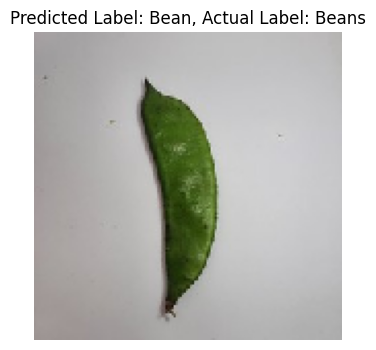

In [37]:
# call the function
generate_predictions(test_image_path, actual_label='Beans')

1/1 [==============================] - 0s 104ms/step


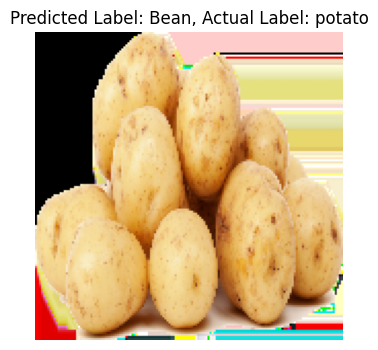

In [39]:
# Generate predictions for external images
external_image_path_1 = "/content/potatoes.webp"
generate_predictions(external_image_path_1, actual_label='potato')